In [1]:
# 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 다항 회귀(Polynomial Regression)

### 다항 회귀(Polynomial Regression) 이해

**다중선형회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(feature)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현

**다항회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
- 선형회귀임

$ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

$ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**
- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환

PolynomialFeatures(degree=차수)

fit_transform(피처)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

x= np.arange(6).reshape(3,2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [4]:
# degree = 차수 degree차항
poly = PolynomialFeatures(degree=2)

# (x1,x2) -> [1, x1, x2, x1**2, x1*x2, x2**2]
# (0,1) -> [1, 0, 1, 0**2, 0*1, 1**2]
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [7]:
x2 = np.arange(9).reshape(3,3)
x2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [5]:
# 1. 1 / 2. 각 요소들 / 3. 요소들끼리 곱
# (x1,x2,x3) -> [1, x1, x2, x3, x1**2, x1*x2, x1*x3, x2**2, x2*x3, x3**2]
# (0,1,2) -> [1, 0, 1, 2, 0**2, 0*1, 0*2, 1**2, 1*2, 2**2]
poly.fit_transform(x2)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

**3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성**

즉 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$ 

In [9]:
def polynomial_func(x):
    y = 1 + 2*x[:,0] + 3*x[:,0]**2 + 4*x[:,1]**3
    return y

In [8]:
x = np.arange(0,4).reshape(2,2)
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print(f'3차 다항식: {poly_ftr}')

3차 다항식: [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


**3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습**

In [12]:
from sklearn.linear_model import LinearRegression

y = polynomial_func(x)

model = LinearRegression()
model.fit(poly_ftr, y)
print(f'회귀계수: {np.round(model.coef_,4)}, intercept: {model.intercept_:.4f}')

coef: [0.     0.1802 0.1802 0.3604 0.5405 0.7207 0.7207 1.0811 1.6216 2.3423], intercept: 1.7568


### 파이프라인(Pipeline)을 이용한 3차 다항회귀 학습  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

**`sklearn.pipeline의 Pipeline 클래스`**

- 연속된 변환을 순서대로 처리할 수 있도록 도와주는 클래스

- 형식 : 연속된 단계를 나타내는 (name, transforms) 튜플 목록을 입력받음
    - 마지막 단계에서는 transforms와 estimator를 모두 사용할 수 있고, 그외는 transforms여야 함
    - transforms는 fit_transform() 메서드를 가지고 있어야 함
    - estrimator는 fit(), predict() 메서드를 가지고 있어야 함
    
- 파이프라인의 fit() 메서드 호출:
    - 모든 transforms의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달
    - 마지막 단계에서는 fit()메서드만 호출

- 파이프라인 객체는 마지막 estimator와 동일한 메서드를 제공

In [16]:
from sklearn.pipeline import Pipeline

x = np.arange(0,4).reshape(2,2)
y = polynomial_func(x)

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)),
          ('linear', LinearRegression())])


In [17]:
model = pipe.fit(x,y)
model

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [18]:
model.named_steps['linear'].coef_

array([0.        , 0.18018018, 0.18018018, 0.36036036, 0.54054054,
       0.72072072, 0.72072072, 1.08108108, 1.62162162, 2.34234234])

### 가상 데이터 생성 및 다항 회귀 추정

**가상 데이터 생성**

In [21]:
n =100
x = 6* np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(n,1)

x_ = np.linspace(-3,3,100).reshape(100,1)
y_ = 0.5 * x_**2 + x_ + 2

print(x.shape, y.shape)

(100, 1) (100, 1)


**scatterplot**

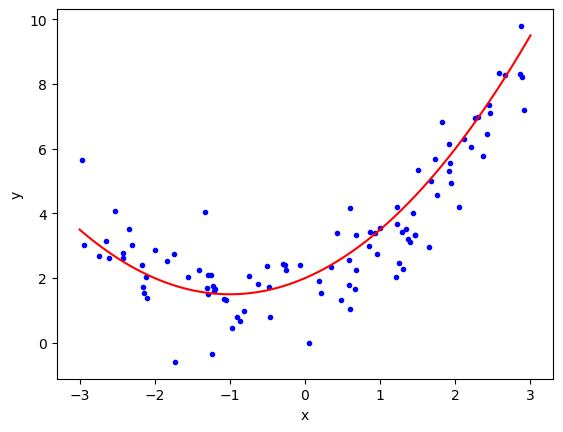

In [22]:
plt.plot(x,y, 'b.')
plt.plot(x_,y_, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
from scipy import stats

stats.pearsonr(x[:,0],y[:,0])

PearsonRResult(statistic=0.6661038893524569, pvalue=3.951372836989267e-14)

- 비선형적으로 분포하고 있는 데이터에 단순히 직선으로 예측하는 것은 잘 안맞을 것이다.
- 사이킷런의 PolynomialFeatures를 사용

**다항식으로 변환**

**선형회귀 LinearRegression 적용하여 회귀계수 추정**

**다항회귀식 시각화**

---